### Data Science Programming 2
## House Price Prediction - Linear Regression (Midterm Project)
#### Kaisar Mussalim
#### BDA-2008 group: Dias Ali, Damir Sarsenov and Togzhan Baydish
### Context
The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues

#### Consisting of 4600 entries for homes in different US cities, this dataset includes 18 different variables that describe various property details such as size and location characteristics.

##### Columns:
- date: When the house was sold
- price: House cost
- bedrooms: How many bedrooms
- bathrooms: How many bathrooms
- sqft_living: Square footage of the house
- sqft_lot: Square footage of the whole area
- floors: How many floors (there are some values like 1.5, 2.5, etc. 0.5 is a room in the floor)
- waterfront: View to the seaside
- view: Amount of windows
- condition: Rates by previous owners
- sqft_above: Square footage house area except basement
- sqft_basement: Square footage of the basement
- yr_built: When it was first build
- yr_renovated: When it was renovated
- street: street of location
- city: city of location
- statezip: zip code which is attached to the city
- country: country of location

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
X = data.drop(["date",'street', 'city','statezip', 'country','price'], axis=1)
y = data[['price']]
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=10)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train,y_train)

reg.score(x_test, y_test)

0.44630339322946044

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
print(data.date.max(),'\n', data.date.min())

2014-07-10 00:00:00 
 2014-05-02 00:00:00


There is no point in date feature, cause it doesn't give much information about dataset

In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

No missing values

In [ ]:
data[data == 0].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,49.0,2.0,2.0,0.0,0.0,0.0,4567.0,4140.0,0.0,0.0,2745.0,0.0,2735.0
mean,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0
std,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0
min,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0
25%,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0
50%,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0
75%,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0
max,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0


There are 49 houses with a price of 0 <br>
Two houses with 0 bedrooms

In [ ]:
data[data['price'] == 0].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.0,3.979592,2.698980,2787.142857,16453.306122,1.500000,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286
std,0.0,1.108486,1.194584,1354.375625,27739.227932,0.520416,0.242226,1.485760,0.826331,1337.148708,612.726149,27.247964,988.903054
min,0.0,1.000000,1.000000,720.000000,3500.000000,1.000000,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000
25%,0.0,3.000000,2.000000,1910.000000,6863.000000,1.000000,0.000000,0.000000,3.000000,1310.000000,0.000000,1952.000000,0.000000
50%,0.0,4.000000,2.500000,2600.000000,9000.000000,1.500000,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000
75%,0.0,5.000000,3.500000,3500.000000,13783.000000,2.000000,0.000000,0.000000,4.000000,3020.000000,900.000000,1998.000000,1999.000000
max,0.0,6.000000,6.250000,8020.000000,188200.000000,3.000000,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000


Next step is to replace these 0 values with means by others features average values

<AxesSubplot:>

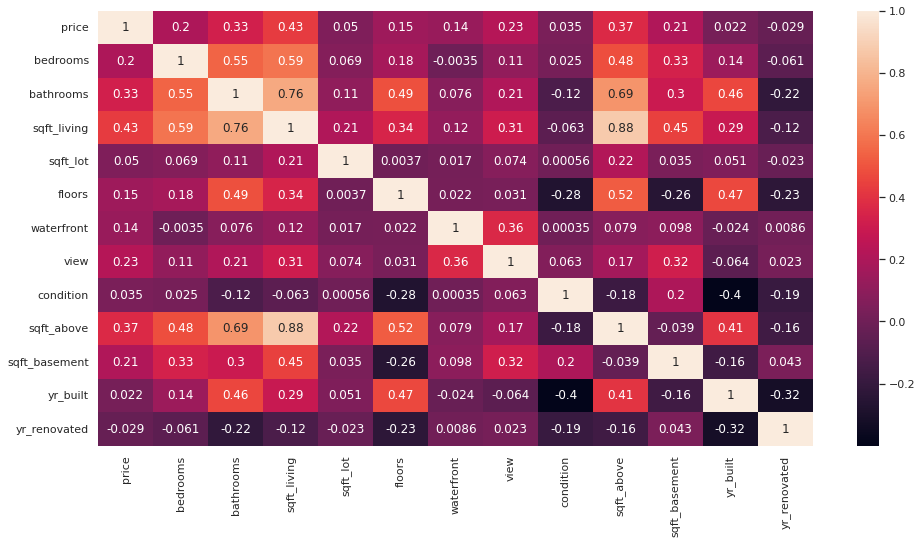

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot = True)

sqft_living has the highest corellation rate to price, sqft_above is the second most corellated feature. But when we corellate them with each other, they have a high corellation rate - 0.88, so we have to remove one

In [ ]:
data.drop('sqft_above',axis = 1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

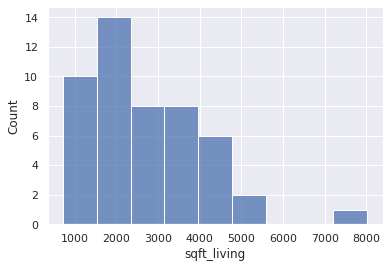

In [ ]:
sns.histplot(data[data['price'] == 0].sqft_living)

In [ ]:
data[data['price'] == 0].sqft_living.describe()

count      49.000000
mean     2787.142857
std      1354.375625
min       720.000000
25%      1910.000000
50%      2600.000000
75%      3500.000000
max      8020.000000
Name: sqft_living, dtype: float64

In [ ]:
data_price = data[(data['sqft_living'] >= 1910) & (data['sqft_living'] <= 3500)].price.mean()
data_price

607565.0552905487

In [ ]:
data['price'].replace(to_replace = 0, value = data_price, inplace = True)
data[data['price'] == 0].count()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
data[data['bedrooms']==0].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,2.000000e+00,2.0,2.0,2.00000,2.000000,2.00000,2.0,2.000000,2.0,2.00000,2.0,2.0,2.0
mean,1.195324e+06,0.0,0.0,3937.00000,16386.000000,2.75000,0.0,1.000000,3.0,3937.00000,0.0,1990.0,2009.0
std,1.418796e+05,0.0,0.0,1234.60844,16435.990022,1.06066,0.0,1.414214,0.0,1234.60844,0.0,0.0,0.0
min,1.095000e+06,0.0,0.0,3064.00000,4764.000000,2.00000,0.0,0.000000,3.0,3064.00000,0.0,1990.0,2009.0
25%,1.145162e+06,0.0,0.0,3500.50000,10575.000000,2.37500,0.0,0.500000,3.0,3500.50000,0.0,1990.0,2009.0
50%,1.195324e+06,0.0,0.0,3937.00000,16386.000000,2.75000,0.0,1.000000,3.0,3937.00000,0.0,1990.0,2009.0
75%,1.245486e+06,0.0,0.0,4373.50000,22197.000000,3.12500,0.0,1.500000,3.0,4373.50000,0.0,1990.0,2009.0
max,1.295648e+06,0.0,0.0,4810.00000,28008.000000,3.50000,0.0,2.000000,3.0,4810.00000,0.0,1990.0,2009.0


Text(0.5, 1.0, 'Bedrooms - sqft_living correspondence')

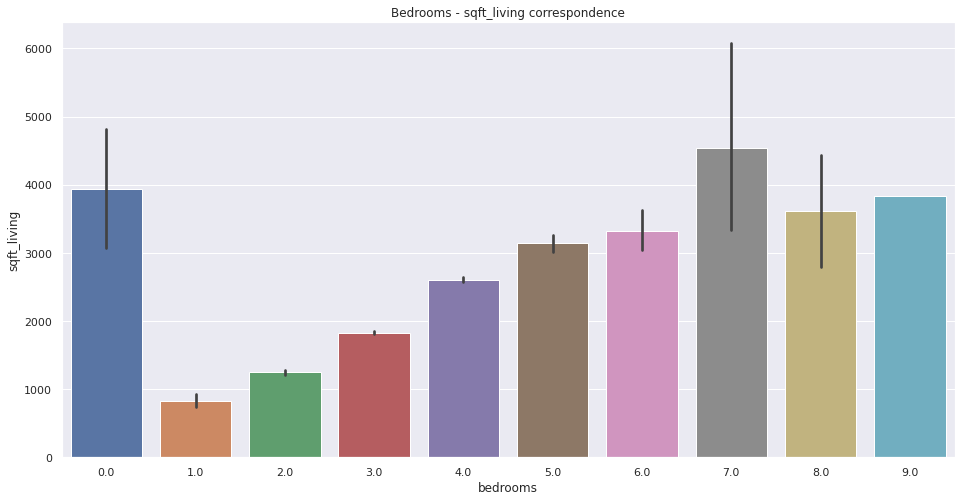

In [ ]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x=data['bedrooms'], y=data['sqft_living'])
ax.set_title('Bedrooms - sqft_living correspondence')

Text(0.5, 1.0, 'Bedrooms - bathrooms correspondence')

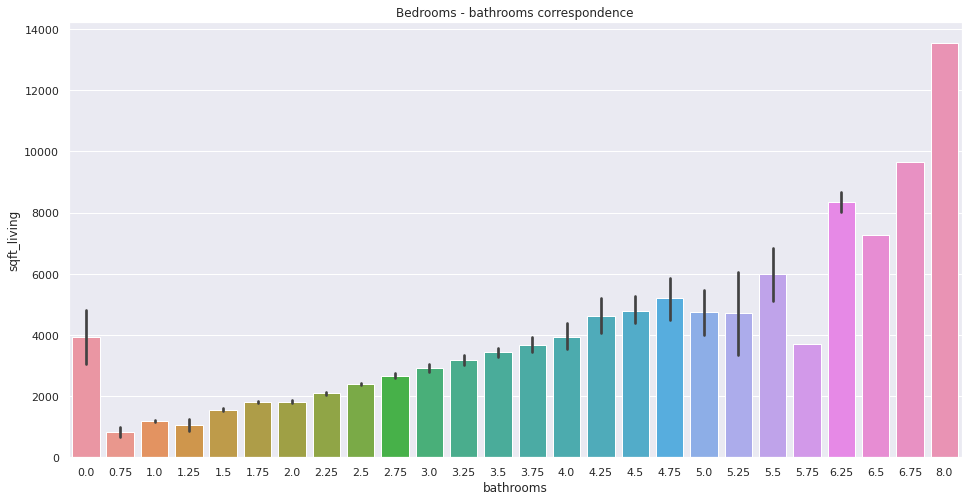

In [ ]:
plt.figure(figsize = (16,8))
sns.barplot(x=data['bathrooms'], y=data['sqft_living']).set_title('Bedrooms - bathrooms correspondence')

In general houses with 4.0 bathrooms have the same living area 

In [ ]:
data['bedrooms'].replace(to_replace = 0, value = 9.0, inplace = True)

In [ ]:
data['bathrooms'].replace(to_replace = 0, value = 4.0, inplace = True)

In [ ]:
data.drop(['date','street','country','statezip','waterfront','condition'],axis=1, inplace=True)

### Outliers

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

ValueError: could not convert string to float: 'Shoreline'

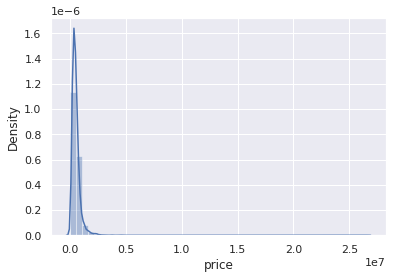

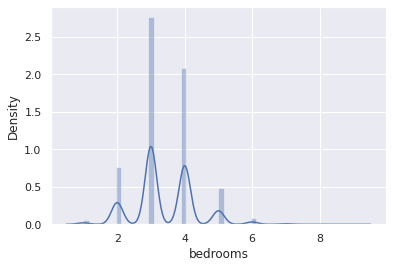

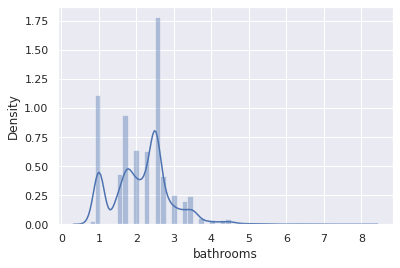

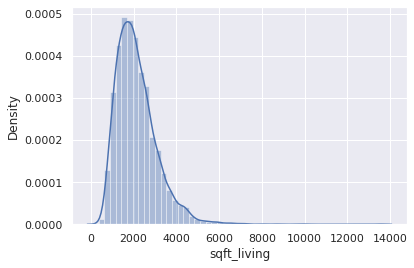

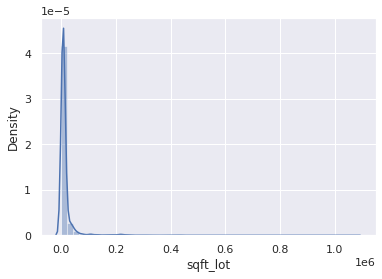

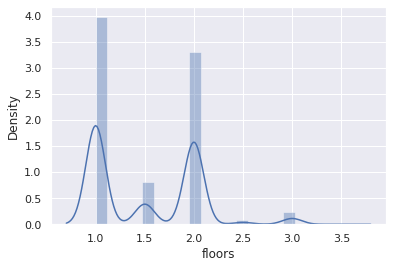

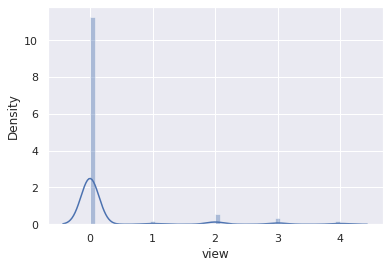

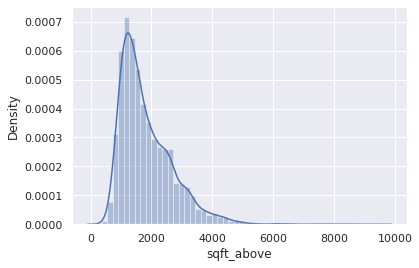

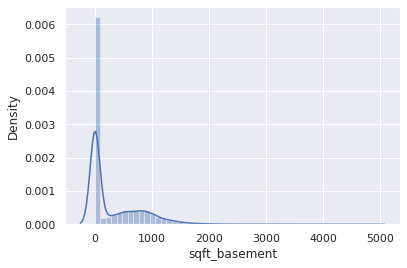

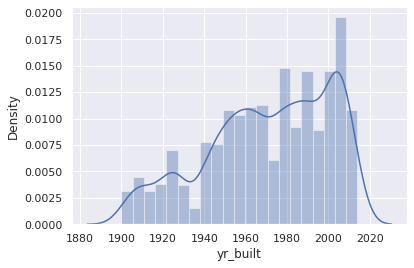

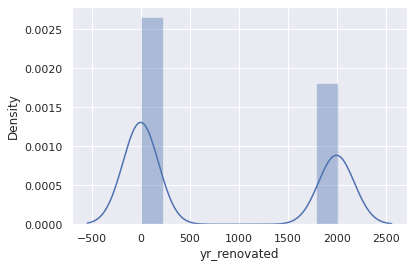

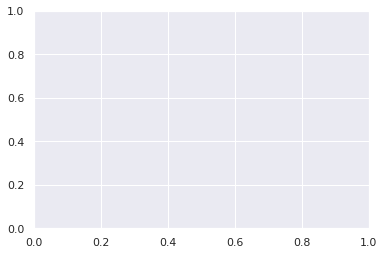

In [ ]:
for column in data.columns:
    plt.figure()
    sns.distplot(data[column])

#### Price

<AxesSubplot:xlabel='price', ylabel='Density'>

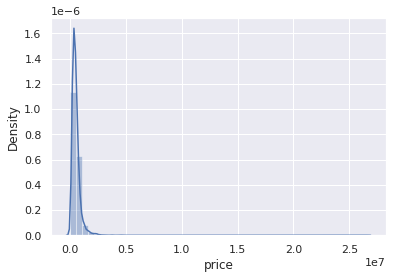

In [ ]:
sns.distplot(data.price)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

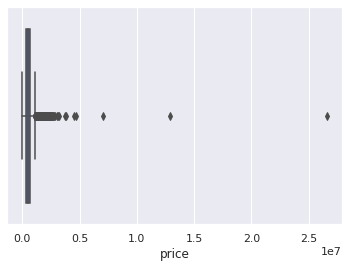

In [ ]:
sns.boxplot(data.price)

There are some outliers for the price feature that might be a noise when making prediction. We must only get the upper boundary, since there is no outliers less than 25 percentile

In [ ]:
Q1 = np.percentile(data['price'],25)
Q3 = np.percentile(data['price'],75)

IQR = Q3 - Q1

upper = Q3 + (IQR * 1.5)

data1 = data[(data['price']<upper)]
data1['price'].count()

4351

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

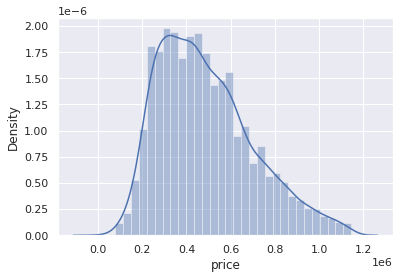

In [ ]:
sns.distplot(data1.price)

Now price values are distributed normally

In [ ]:
data1['price'] = data1['price'].astype(int)
bedroom = data1.groupby(['bedrooms']).price.agg([len, "mean", min, max])
bedroom

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,len,mean,min,max
bedrooms,,,,
1.0,38,290064.868421,80000,607565
2.0,562,389313.560498,7800,1087500
3.0,1984,446979.531250,83300,1145000
4.0,1410,563220.648936,84350,1140000
5.0,296,585716.925676,185000,1135250
6.0,48,596956.875000,175000,1135000
7.0,10,602200.000000,280000,999000
8.0,1,340000.000000,340000,340000
9.0,2,847499.500000,599999,1095000


Here probably it will be a good idea to tak all the houses with 8 and 9 bedrooms as 6 bedrooms houses, since they dont have enough values to make a model unbiased

#### Bedrooms and bathrooms

In [ ]:
data2 = data1[data1['bedrooms'] < 7]

In [ ]:
bathroom = data2.groupby(['bathrooms']).price.agg([len, "mean", min, max])
bathroom

,len,mean,min,max
bathrooms,,,,
0.75,17,293955.941176,80000,562100
1.00,742,335956.960916,7800,1039000
1.25,3,461150.000000,321950,545000
1.50,287,404213.397213,107500,1120000
1.75,620,446640.943548,120750,1065000
2.00,421,457989.258907,83300,1100000
2.25,403,503399.875931,132250,1140000
2.50,1143,532125.810149,168000,1145000
2.75,261,615952.551724,188000,1135000


This is an American thing to split bathrooms into decimals. So there are usuaally 4 components in a bathroom: a sink, a shower, a bathtub, a toilet. Since there are not much data, we rounded it all.

Lets take houses with 4.75 bathrooms as 4.50 and (5.25, 5.50) as 5.0. All houses with more than 5.50 bathrooms can be dropped.

In [ ]:
data2['bathrooms'] = data2['bathrooms'].astype(int)
data2['bathrooms'].value_counts()
data2['bathrooms'].replace(to_replace = 0, value = 4, inplace = True)
data3 = data2.drop(data2[data['bathrooms'] > 5].index)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [ ]:
data3.groupby(['bathrooms']).price.agg([len, "mean", min, max])

,len,mean,min,max
bathrooms,,,,
1,1652,389582.412228,7800,1120000
2,2228,522741.043537,83300,1145000
3,397,666009.216625,195000,1130000
4,54,655765.203704,80000,1135250
5,4,721149.000000,495000,1042031


In [ ]:
data3.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.316942,0.403705,0.624141,0.093541,0.273193,0.220178,0.534494,0.230696,0.058712,-0.071641
bedrooms,0.316942,1.000000,0.401807,0.598705,0.056058,0.159423,0.060592,0.467025,0.303450,0.164354,-0.071650
bathrooms,0.403705,0.401807,1.000000,0.612921,0.083817,0.444752,0.123217,0.553192,0.175645,0.424637,-0.204898
sqft_living,0.624141,0.598705,0.612921,1.000000,0.194774,0.334401,0.202636,0.856201,0.369920,0.336254,-0.141356
sqft_lot,0.093541,0.056058,0.083817,0.194774,1.000000,-0.003872,0.079202,0.195247,0.020834,0.040469,-0.015314
floors,0.273193,0.159423,0.444752,0.334401,-0.003872,1.000000,-0.013490,0.528441,-0.311708,0.500034,-0.244054
view,0.220178,0.060592,0.123217,0.202636,0.079202,-0.013490,1.000000,0.082560,0.238488,-0.062635,0.033276
sqft_above,0.534494,0.467025,0.553192,0.856201,0.195247,0.528441,0.082560,1.000000,-0.163269,0.457223,-0.175065
sqft_basement,0.230696,0.303450,0.175645,0.369920,0.020834,-0.311708,0.238488,-0.163269,1.000000,-0.180100,0.044880
yr_built,0.058712,0.164354,0.424637,0.336254,0.040469,0.500034,-0.062635,0.457223,-0.180100,1.000000,-0.321749


In [ ]:
data3.groupby(['floors']).price.agg([len, "mean", min, max])

,len,mean,min,max
floors,,,,
1.0,2121,420573.731730,7800,1135000
1.5,419,533450.582339,132500,1140000
2.0,1646,556656.611179,84350,1145000
2.5,27,690866.666667,195000,1090000
3.0,121,495309.132231,288790,979000
3.5,1,563500.000000,563500,563500


0.5 here represents a room in the roof probably.

In [ ]:
data = data3
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000,3.0,1,1340,7912,1.5,0,1340,0,1955,2005,Shoreline
2,342000,3.0,2,1930,11947,1.0,0,1930,0,1966,0,Kent
3,420000,3.0,2,2000,8030,1.0,0,1000,1000,1963,0,Bellevue
4,550000,4.0,2,1940,10500,1.0,0,1140,800,1976,1992,Redmond
5,490000,2.0,1,880,6380,1.0,0,880,0,1938,1994,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3.0,1,1510,6360,1.0,0,1510,0,1954,1979,Seattle
4596,534333,3.0,2,1460,7573,2.0,0,1460,0,1983,2009,Bellevue
4597,416904,3.0,2,3010,7014,2.0,0,3010,0,2009,0,Renton
4598,203400,4.0,2,2090,6630,1.0,0,1070,1020,1974,0,Seattle


In [ ]:
data = data.drop(columns = ['yr_renovated'], axis = 1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,city
0,313000,3.0,1,1340,7912,1.5,0,1340,0,1955,Shoreline
2,342000,3.0,2,1930,11947,1.0,0,1930,0,1966,Kent
3,420000,3.0,2,2000,8030,1.0,0,1000,1000,1963,Bellevue
4,550000,4.0,2,1940,10500,1.0,0,1140,800,1976,Redmond
5,490000,2.0,1,880,6380,1.0,0,880,0,1938,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3.0,1,1510,6360,1.0,0,1510,0,1954,Seattle
4596,534333,3.0,2,1460,7573,2.0,0,1460,0,1983,Bellevue
4597,416904,3.0,2,3010,7014,2.0,0,3010,0,2009,Renton
4598,203400,4.0,2,2090,6630,1.0,0,1070,1020,1974,Seattle


In [ ]:
data.dtypes

price              int64
bedrooms         float64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors           float64
view               int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
city              object
dtype: object

Text(0.5, 1.0, 'Sqft_living - Price')

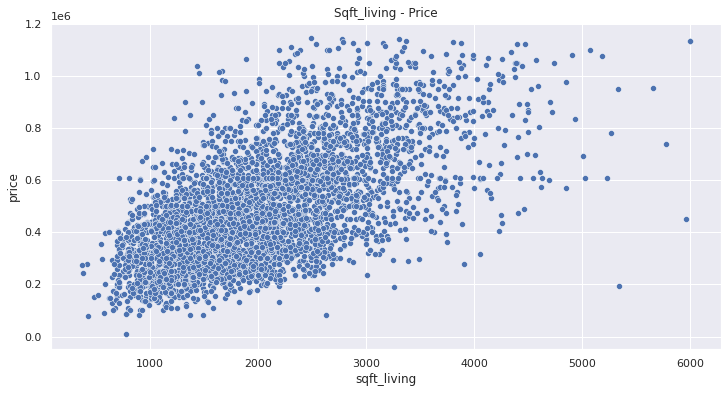

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=data, x="sqft_living", y="price")
ax.set_title('Sqft_living - Price')

In [ ]:
data['sqft_living'] = np.where((data.sqft_living >6000 ), 6000, data.sqft_living)

Text(0.5, 1.0, 'Sqft_living - Price')

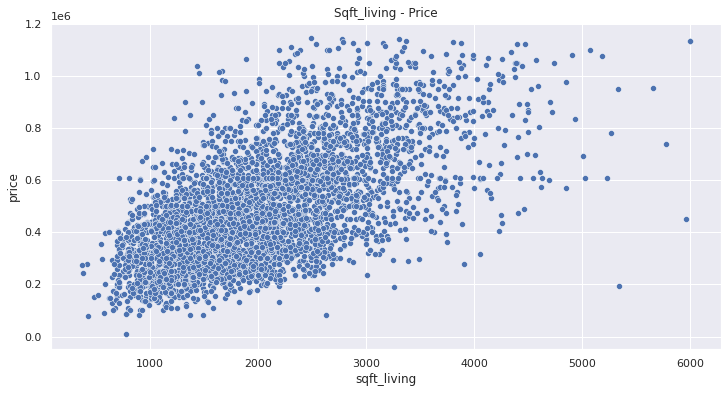

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=data, x="sqft_living", y="price")
ax.set_title('Sqft_living - Price')

### Encoding

In [ ]:
data = pd.get_dummies(data, columns=['city'], prefix = ['city'])

In [ ]:
data.dtypes

price                         int64
bedrooms                    float64
bathrooms                     int64
sqft_living                   int64
sqft_lot                      int64
floors                      float64
view                          int64
sqft_above                    int64
sqft_basement                 int64
yr_built                      int64
city_Algona                   uint8
city_Auburn                   uint8
city_Beaux Arts Village       uint8
city_Bellevue                 uint8
city_Black Diamond            uint8
city_Bothell                  uint8
city_Burien                   uint8
city_Carnation                uint8
city_Clyde Hill               uint8
city_Covington                uint8
city_Des Moines               uint8
city_Duvall                   uint8
city_Enumclaw                 uint8
city_Fall City                uint8
city_Federal Way              uint8
city_Inglewood-Finn Hill      uint8
city_Issaquah                 uint8
city_Kenmore                

In [ ]:
X = data.drop(['price'],axis = 1)
y = data["price"]

## Modelling

In [ ]:
X_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(x_test, y_test)

0.624276532046825

In [ ]:
X_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=10)
reg.fit(X_train, y_train)
reg.score(x_test, y_test)

0.6395964895061939

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from math import sqrt
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  ExtraTreesRegressor 
from sklearn.model_selection import cross_val_score
from sklearn import svm
import warnings

In [ ]:
X = data[['sqft_living']]
y = data['price']
X_train,x_test,y_train,y_test=train_test_split(X,y)
# Linear Regression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.452922909490861

In [ ]:
X = data[['sqft_living','sqft_lot']]
y = data['price']
X_train,x_test,y_train,y_test=train_test_split(X,y)
# Linear Regression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.4690926847223289

In [ ]:
X = data[['sqft_living','sqft_lot', 'sqft_basement']]
y = data['price']
X_train,x_test,y_train,y_test=train_test_split(X,y)
# Linear Regression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.421994709277309

In [ ]:
X = data[['sqft_living','sqft_lot', 'sqft_basement', 'waterfront']]
y = data['price']
X_train,x_test,y_train,y_test=train_test_split(X,y)
# Linear Regression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.4518554595181614

In [ ]:
X = data[['sqft_living','sqft_lot', 'sqft_basement', 'waterfront', 'view']]
y = data['price']
X_train,x_test,y_train,y_test=train_test_split(X,y)
# Linear Regression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.18309477344856318

In [ ]:
X = data.drop(['date','street','country','price', 'city', 'statezip'], axis = 1)
y = data['price']
X_train,x_test,y_train,y_test=train_test_split(X,y)

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.5396102624951218

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dectree =  DecisionTreeRegressor(random_state=10,max_depth=6, min_samples_leaf=0.1) 
dectree.fit(X_train, y_train)
print(dectree.score(x_test, y_test))

0.35911407107379534


In [ ]:
RForest=RandomForestRegressor()
RForest.fit(X_train,y_train)
y_predict=RForest.predict(x_test)
r2_score(y_test,y_predict)

0.20707246847464056

In [ ]:
lassocv = LassoCV(alphas = None, cv = 4, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)
r2_score(y_test,lasso.predict(x_test))

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality

0.22184291115757315

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.322e+12, tolerance: 1.313e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.322e+12, tolerance: 1.313e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of t

Text(0.5, 1.0, 'Lasso coefficients as a function of the regularization')

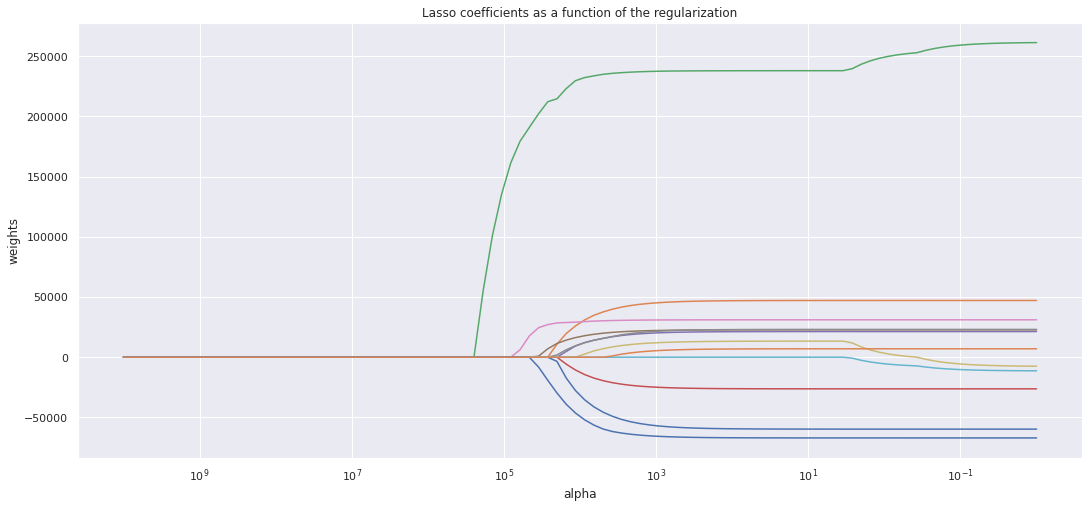

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
import numpy as np
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    mean_squared_error(y_test, lasso.predict(scale(x_test)))
    

fig, ax = plt.subplots(figsize=(18,8))
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')


### Ridge

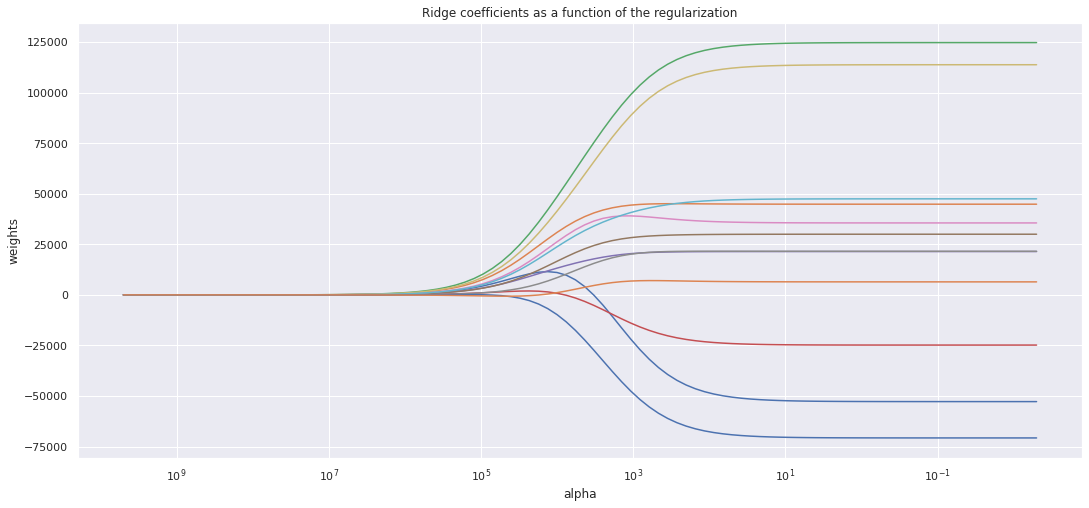

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

fig, ax = plt.subplots(figsize=(18,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
ridge2 = Ridge(alpha=4)
ridge2.fit(scaler.transform(X_train), y_train)
pred = ridge2.predict(scaler.transform(x_test))
mean_squared_error(y_test, pred)

59623149783.421524

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4b3be609-75f7-4837-8b3e-a0be8da87f72' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>